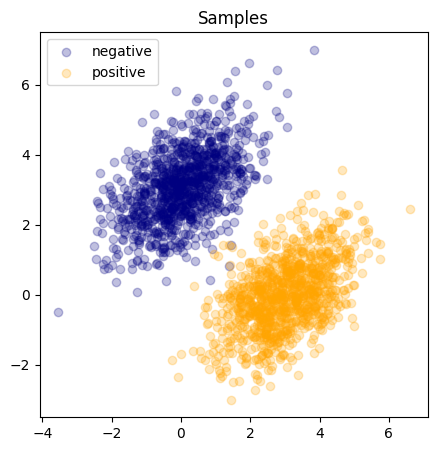

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

num_samples_per_class = 1000

# 공분산은 동일하지만 평균이 다른 두 샘플 그룹을 임의로 생성.
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5], [0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5], [0.5, 1]],
    size=num_samples_per_class)

# 샘플 그룹 시각화.
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
ax.scatter(negative_samples[:, 0],
           negative_samples[:, 1],
           color='navy',
           alpha=0.25,
           label='negative')
ax.scatter(positive_samples[:, 0],
           positive_samples[:, 1],
           color='orange',
           alpha=0.25,
           label='positive')
ax.set_title('Samples')
ax.legend()
plt.show()

In [2]:
import tensorflow as tf

# 데이터(shape=(2000, 2))
x_train = np.vstack(
    (negative_samples, positive_samples)).astype(np.float32)
# 레이블(shape=(2000, 1))
y_train = np.vstack(
    (np.zeros(shape=(num_samples_per_class, 1)),
     np.ones(shape=(num_samples_per_class, 1)))).astype(np.float32)

del negative_samples
del positive_samples

input_dim = 2   # 입력 차원: 2 (x-y 좌표)
output_dim = 1  # 출력 차원: 1 (양성 확률값: 0~1 사이의 부동소수점)

W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

2023-09-08 16:21:40.611400: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-08 16:21:41.939077: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-08 16:21:41.956331: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-

In [3]:
def model(inputs):
    # 단일 퍼셉트론 모델
    return tf.matmul(inputs, W) + b

def square_loss(targets, predictions):
    # 평균제곱오차(MSE; Mean Squared Error)
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

def training_step(inputs, targets, lr=0.1):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * lr)
    b.assign_sub(grad_loss_wrt_b * lr)
    return loss

In [4]:
for step in range(40):
    loss = training_step(x_train, y_train)
    print(f"step:{step}, loss:{loss:.4f}")

predictions = model(x_train)

step:0, loss:0.4970
step:1, loss:0.0877
step:2, loss:0.0699
step:3, loss:0.0641
step:4, loss:0.0604
step:5, loss:0.0573
step:6, loss:0.0545
step:7, loss:0.0519
step:8, loss:0.0495
step:9, loss:0.0474
step:10, loss:0.0454
step:11, loss:0.0436
step:12, loss:0.0420
step:13, loss:0.0405
step:14, loss:0.0391
step:15, loss:0.0378
step:16, loss:0.0367
step:17, loss:0.0356
step:18, loss:0.0347
step:19, loss:0.0338
step:20, loss:0.0330
step:21, loss:0.0323
step:22, loss:0.0316
step:23, loss:0.0310
step:24, loss:0.0304
step:25, loss:0.0299
step:26, loss:0.0294
step:27, loss:0.0290
step:28, loss:0.0286
step:29, loss:0.0283
step:30, loss:0.0279
step:31, loss:0.0276
step:32, loss:0.0274
step:33, loss:0.0271
step:34, loss:0.0269
step:35, loss:0.0267
step:36, loss:0.0265
step:37, loss:0.0263
step:38, loss:0.0262
step:39, loss:0.0260


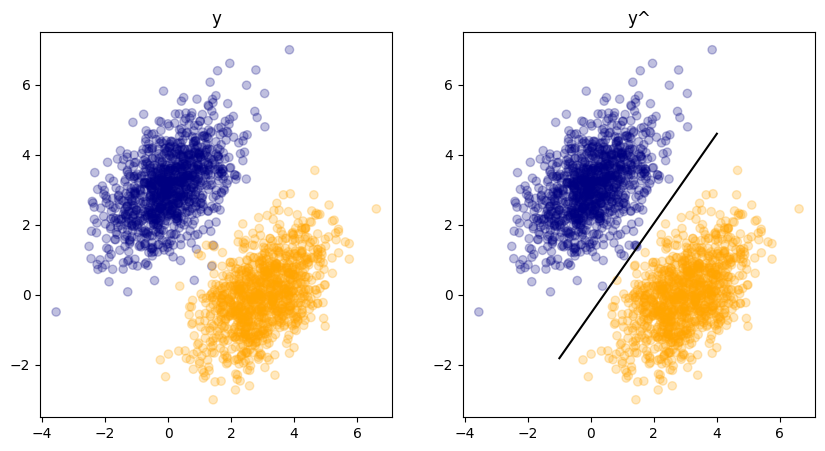

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

axes[0].set_title('y')
axes[0].scatter(x_train[:, 0],
                x_train[:, 1],
                color=np.where(y_train[:, 0] == 0, 'navy', 'orange'),
                alpha=0.25)

axes[1].set_title('y^')
axes[1].scatter(x_train[:, 0],
                x_train[:, 1],
                color=np.where(predictions[:, 0] <= 0.5, 'navy', 'orange'),
                alpha=0.25)

x = np.linspace(-1, 4, 100)
y = -W[0] / W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, '-k')

_ = plt.show()